In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV,LogisticRegression
%matplotlib inline

## f(x,a)=x+(1/a)*log(exp(-ax)+1) (x>=1)

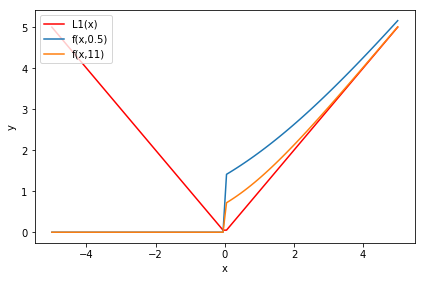

In [23]:
f=lambda x,a:(x+(1/a)*np.log(1+np.exp(-a*x)))*(x>=0)
x=np.linspace(-5,5,100)
norm1_x=np.abs(x)
plt.figure()
plt.plot(x,norm1_x,'r-',label='L1(x)')
# plt.plot(x,f(x,0.1),label='f(x,0.1)')
plt.plot(x,f(x,0.5),label='f(x,0.5)')
plt.plot(x,f(x,1),label='f(x,11)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()

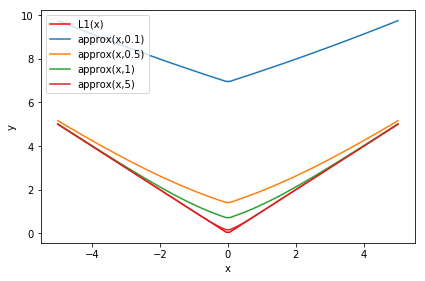

In [24]:
plt.plot(x,norm1_x,'r-',label='L1(x)')
plt.plot(x,f(x,0.1)+f(-x,0.1),label='approx(x,0.1)')
plt.plot(x,f(x,0.5)+f(-x,0.5),label='approx(x,0.5)')
plt.plot(x,f(x,1)+f(-x,1),label='approx(x,1)')
plt.plot(x,f(x,5)+f(-x,5),label='approx(x,5)')


plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()

## 广告例子
 . 学习LinearRegression模型的使用,model.fit,model.score,model.coef,model.intercept<br />
 . 学习交叉验证train_test_split(data,train_size=.8)的使用

In [25]:
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [26]:
Y=np.array(data['Sales'])
X=np.array(data[['TV','Radio','Newspaper']])
X=np.hstack((X,np.ones((X.shape[0],1)))) #add bias term
print(X[:3])

[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]]


Tv with Sales: 0.7822244248616064
Radio with Sales: 0.5762225745710552
Newspaper with Sales: 0.22829902637616534


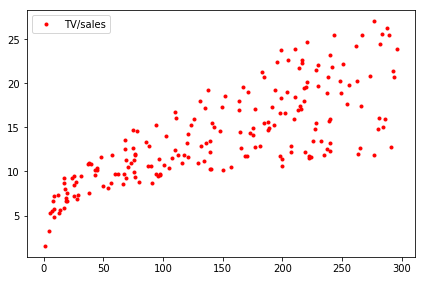

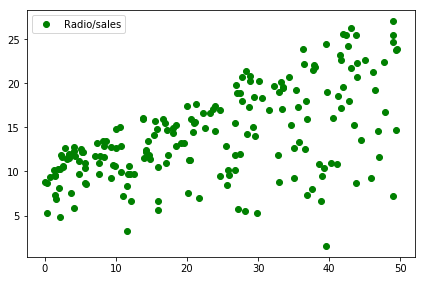

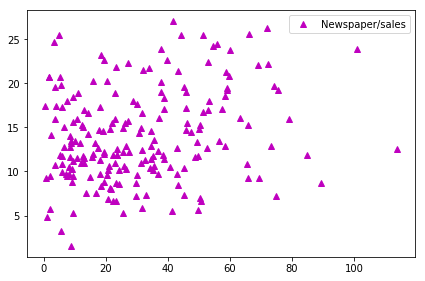

In [27]:
plt.figure()
plt.plot(X[:,0],Y,'r.',label='TV/sales')
print('Tv with Sales:',stats.pearsonr(X[:,0],Y)[0])
plt.tight_layout()
plt.legend()
plt.figure()
plt.plot(X[:,1],Y,'go',label='Radio/sales')
print('Radio with Sales:',stats.pearsonr(X[:,1],Y)[0])

plt.tight_layout()
plt.legend()
plt.figure()
plt.plot(X[:,2],Y,'m^',label='Newspaper/sales')
print('Newspaper with Sales:',stats.pearsonr(X[:,2],Y)[0])
plt.tight_layout()
plt.legend()


In [28]:
theta,residual,rank,sigularValue=np.linalg.lstsq(X,Y)
print('theta:',theta)
print(residual)
RMES=np.average((X.dot(theta)-Y)**2)
print(RMES)

theta: [ 4.57646455e-02  1.88530017e-01 -1.03749304e-03  2.93888937e+00]
[556.8252629]
2.7841263145109365


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [29]:
#3个重要的指标TSS,RSS,R2
#Total sum of square (y-ybar)**2
#Residual Sum of square (y-yhat)**2
#R2=1-(/RSSTSS)
def TSS(y):return np.sum((y-np.mean(y))**2)
def RSS(y,yhat):return  np.sum((y-yhat)**2)
def R2(y,yhat):return 1-RSS(y,yhat)/TSS(y)

In [30]:
print('RSS:',R2(Y,X.dot(theta)))

RSS: 0.8972106381789521


In [31]:
#使用库函数划分数据
data=np.array(pd.read_csv('Advertising.csv'))
Train,Test=train_test_split(data,train_size=0.9)
print(Train.shape)
print(Test.shape)

(180, 5)
(20, 5)


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:
model=LinearRegression(n_jobs=1)

In [33]:
model.fit(Train[:,1:4],Train[:,4])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#注意和上马np.linalg.lstsq的比较
print(model.coef_)
print(model.intercept_) 

[ 0.04574128  0.18848761 -0.0014564 ]
2.9346869590524065


In [35]:
#比较自己写的和线性模型的score
print('R2:',R2(Test[:,4],Test[:,1:4].dot(model.coef_)+model.intercept_))
print('R2:',model.score(Test[:,1:4],Test[:,4]))

R2: 0.9563193467372462
R2: 0.9563193467372462


In [36]:
testX=Test[:,1:4]
testY=Test[:,4]
order=np.argsort(testY,axis=0) #升序排列销售量
testX=testX[order,:]
testY=testY[order]

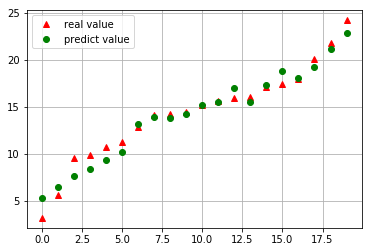

In [37]:
plt.figure(facecolor='w')
plt.plot(testY,'r^',label='real value')
plt.plot(model.predict(testX),'go',label='predict value')
plt.grid()
plt.legend()

训练特征： (160, 10)
coef: [ 5.12717198e+00  5.05329664e-02  3.04164168e-02  1.54885687e-03
 -1.03925161e-04  1.04396089e-03 -3.18696104e-05  2.37535664e-04
 -5.99097830e-05  8.18889472e-05]
train score: 0.9902824453123369
测试特征： (40, 10)
test score: 0.9715371723181567


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


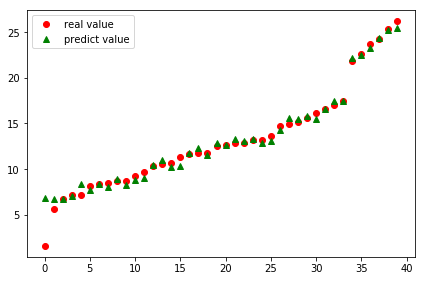

In [38]:
##使用非线性特征
def nonLinear(degreee=2):
    data=pd.read_csv('Advertising.csv')
    train,test=train_test_split(data,train_size=.8,random_state=0)
    #训练
    X=np.array(train[['TV','Radio','Newspaper']])
    Y=np.array(train['Sales'])
    poly=PolynomialFeatures(degreee)
    X=poly.fit_transform(X)
    print("训练特征：",X.shape)
    model=LinearRegression(fit_intercept=False)
    model.fit(X,Y)
    print('coef:',model.coef_)
    print('train score:',model.score(X,Y))
    
    #预测
    X=np.array(test[['TV','Radio','Newspaper']])
    Y=np.array(test['Sales'])
    X=poly.fit_transform(X)
    print("测试特征：",X.shape)
    order=np.argsort(Y)
    X=X[order]
    Y=Y[order]
    
    plt.plot(Y,'ro',label='real value')
    plt.plot(model.predict(X),'g^',label='predict value')
    print('test score:',model.score(X,Y))
    plt.legend()
    plt.tight_layout()
nonLinear(2)

## 使用Ridge或Lasso,进行超参数选择

In [39]:
ridgeModel=Ridge(fit_intercept=False) #||y - Xw||^2_2 + alpha * ||w||^2_2
alphaCan=np.logspace(-15,-5,100)
# print('alphaCan:',alphaCan)
best_model=GridSearchCV(ridgeModel,param_grid={'alpha':alphaCan},cv=5,verbose=0,)
poly=PolynomialFeatures(degree=2)
X_degress2=poly.fit_transform(Train[:,1:4])
best_model.fit(X_degress2,Train[:,4])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-15, 1.26186e-15, ..., 7.92483e-06, 1.00000e-05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
print('best_index_:',best_model.best_index_)
print('best_params_:',best_model.best_params_)
print('best_score',best_model.best_score_)

best_index_: 17
best_params_: {'alpha': 5.214008287999674e-14}
best_score 0.9853253338282197


In [41]:
### using high order feature,get better R2 score
best_model.score(poly.fit_transform(Test[:,1:4]),Test[:,4])
# print(ridgeModel.alpha)

0.9770136707073835

In [42]:
# plt.figure(facecolor='w')
# plt.plot(testY,'r^',label='real value')
# plt.plot(best_model.predict(testX),'go',label='predict value')
# plt.grid()
# plt.legend()

# 3种算法的差异
1.学习下Pipline的使用
2.学习下超参数的选择，比如RidgeCv,LassoCv,ElasticNetCv

In [43]:
from sklearn.pipeline import Pipeline

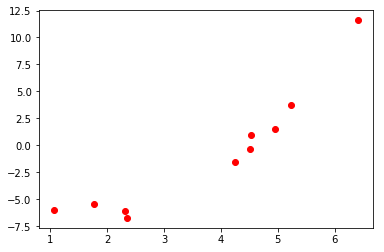

In [44]:
def dataset(N = 10,seed=0):
    np.random.seed(seed)
    x = np.linspace(0, 6, N) + np.random.randn(N)
    x = np.sort(x)
    y = x**2 - 4*x - 3 + np.random.randn(N)
    x.shape = -1, 1
    y.shape = -1, 1
    return x,y
x,y=dataset()
plt.plot(x,y,'ro')

交叉验证的结果： 0.004641588833612777
degree 0,R2 -0.086185,alpha=0.004642
交叉验证的结果： 0.1
degree 1,R2 0.550850,alpha=0.100000
交叉验证的结果： 0.001
degree 2,R2 0.953320,alpha=0.001000
交叉验证的结果： 0.046415888336127774
degree 3,R2 0.953194,alpha=0.046416
交叉验证的结果： 0.021544346900318832
degree 4,R2 0.949450,alpha=0.021544
交叉验证的结果： 0.1
degree 5,R2 0.945208,alpha=0.100000


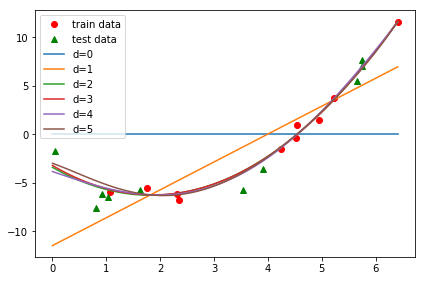

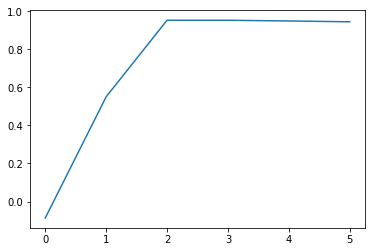

In [45]:
#实验1,测试特征选择（d）与范化能力
scores=[]
x,y=dataset()
plt.plot(x,y,'ro',label='train data')
x_test,y_test=dataset(seed=1)
plt.plot(x_test,y_test,'g^',label='test data')

for d in range(0,6):
#     model=Pipeline([('poly',PolynomialFeatures(d)),('estimator',Ridge(alpha=0,fit_intercept=False))])
    alphas=np.logspace(-3,0,10)
    
    model=Pipeline([('poly',PolynomialFeatures(d)),('estimator',
                                                    RidgeCV(alphas=alphas,
                                                            fit_intercept=False,
                                                            store_cv_values=True,
                                                                       ))])
    
#     
    model.fit(x,y)
    cv_values=np.squeeze(model.get_params()['estimator'].cv_values_)
    cv_values=np.average(cv_values,axis=0)
    print('交叉验证的结果：',alphas[np.argmin(cv_values)])
    xrange=np.linspace(0,np.max(x),100).reshape((-1,1))
    plt.plot(xrange.ravel(),model.predict(xrange),label='d='+str(d))

    #测试范化能力
    alpha=float(model.get_params()['estimator'].alpha_)

    print('degree %d,R2 %f,alpha=%f'%(d,model.score(x_test,y_test),alpha))
    scores.append(model.score(x_test,y_test))
plt.legend()
plt.tight_layout()
plt.figure()
plt.plot(np.arange(len(scores)),scores)
# RidgeCV()

In [46]:
def xss(y, y_hat):
    #返回y和y_hat的相关性和R2分数
    y = y.ravel()
    y_hat = y_hat.ravel()
    # Version 1
    tss = ((y - np.average(y)) ** 2).sum()
    rss = ((y_hat - y) ** 2).sum()
    ess = ((y_hat - np.average(y)) ** 2).sum()
    r2 = 1 - rss / tss
    corr_coef = np.corrcoef(y, y_hat)[0, 1]
    return r2, corr_coef

In [47]:
models = [
            Pipeline([('poly', PolynomialFeatures()),('linear', LinearRegression(fit_intercept=False))]),
            Pipeline([('poly', PolynomialFeatures()),('linear', RidgeCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))]),
            Pipeline([('poly', PolynomialFeatures()),('linear', LassoCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))]),
            Pipeline([('poly', PolynomialFeatures()),('linear', ElasticNetCV(alphas=np.logspace(-3, 2, 50), 
                                                                             l1_ratio=[.1, .5, .7, .9, .95, .99, 1],fit_intercept=False))])
    ]

In [48]:
# PolynomialFeatures Examples
X = np.arange(6).reshape(3, 2)
print('X:\n',X)
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
poly = PolynomialFeatures(2)
Xnew=poly.fit_transform(X)
print('Xnew(d=2):\n',Xnew)
# array([[ 1.,  0.,  1.,  0.,  0.,  1.],
#        [ 1.,  2.,  3.,  4.,  6.,  9.],
#        [ 1.,  4.,  5., 16., 20., 25.]])
poly = PolynomialFeatures(interaction_only=True)
Xnew=poly.fit_transform(X)
print('Xnew(d=2,interaction only):\n',Xnew)

# array([[ 1.,  0.,  1.,  0.],
#        [ 1.,  2.,  3.,  6.],
#        [ 1.,  4.,  5., 20.]])

X:
 [[0 1]
 [2 3]
 [4 5]]
Xnew(d=2):
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
Xnew(d=2,interaction only):
 [[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


Linear：1阶，系数为： [-12.21291539   3.04029646]
Linear：2阶，系数为： [-3.41472112 -3.13609311  0.85548084]
Linear：3阶，系数为： [-3.14619443 -3.42211466  0.93856131 -0.00714648]
Linear：4阶，系数为： [-5.07759822 -0.24057241 -0.74002644  0.3348974  -0.02347316]
Linear：5阶，系数为： [-28.99465219  46.90867481 -33.29579862  10.41755431  -1.4592574
   0.07649675]
Linear：6阶，系数为： [-4.58926953e+01  8.86250208e+01 -7.25193216e+01  2.85178735e+01
 -5.80766495e+00  5.96787524e-01 -2.44397198e-02]
Linear：7阶，系数为： [ 8.17649474e+02 -2.26385149e+03  2.46576955e+03 -1.38815143e+03
  4.39152765e+02 -7.87004277e+01  7.45595403e+00 -2.89957013e-01]
Linear：8阶，系数为： [ 1.02419439e+03 -2.87511474e+03  3.20515105e+03 -1.86957591e+03
  6.25076544e+02 -1.22609162e+02  1.36852029e+01 -7.77693175e-01
  1.61999770e-02]
Ridge：1阶，alpha=0.086851，系数为： [-11.56409832   2.89359283]
Ridge：2阶，alpha=0.001000，系数为： [-3.41095803 -3.13792361  0.85568561]
Ridge：3阶，alpha=0.033932，系数为： [-3.21471668e+00 -3.28621523e+00  8.90369985e-01 -2.56479119e-03]
Ridge：4阶，

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 [-10.54406049   2.6535139 ]
LASSO：2阶，alpha=0.001000，系数为： [-3.40914786 -3.13783917  0.85559641]
LASSO：3阶，alpha=3.727594，系数为： [-0.         -0.         -0.66960854  0.14771301]
LASSO：4阶，alpha=12.067926，系数为：

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 [-0.         -0.         -0.         -0.08891493  0.02061264]
LASSO：5阶，alpha=39.069399，系数为： [-0.         -0.         -0.         -0.         -0.01068605  0.00272415]
LASSO：6阶，alpha=0.002024，系数为：

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 [-4.27296141e+00 -1.97146140e+00  3.86841795e-01  5.21018466e-02
  2.65150646e-03 -1.46790649e-04 -5.78745263e-05]
LASSO：7阶，alpha=3.727594，系数为： [-0.00000000e+00 -0.00000000e+00 -7.26631099e-01 -2.18322558e-02
  3.79144692e-02  2.74069597e-03 -2.50559299e-04 -6.53876454e-05]
LASSO：8阶，alpha=9.540955，系数为：

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.34914766e-01
 -0.00000000e+00  7.40443711e-03  1.56847769e-04 -4.03561179e-05
 -9.07329432e-06]
ElasticNet：1阶，alpha=0.026827，l1_ratio=0.100000，系数为： [-10.54661776   2.66338449]
ElasticNet：2阶，alpha=0.021210，l1_ratio=0.100000，系数为：

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 [-2.95259749 -3.32866603  0.87440976]
ElasticNet：3阶，alpha=5.963623，l1_ratio=0.100000，系数为： [-0.18828504 -0.37485189 -0.5358093   0.13752811]
ElasticNet：4阶，alpha=62.505519，l1_ratio=0.100000，系数为：

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 [-0.         -0.         -0.0255562  -0.0859975   0.02089437]
ElasticNet：5阶，alpha=0.013257，l1_ratio=0.100000，系数为： [-3.10196571e+00 -2.91554487e+00  5.70710803e-01  5.83639028e-02
  3.32441360e-04 -5.55386022e-04]
ElasticNet：6阶，alpha=0.001600，l1_ratio=0.900000，系数为：

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 [-4.25232691e+00 -1.99159946e+00  3.92240055e-01  5.17473556e-02
  2.62967305e-03 -1.46930831e-04 -5.76135171e-05]
ElasticNet：7阶，alpha=5.963623，l1_ratio=0.500000，系数为： [-0.00000000e+00 -0.00000000e+00 -4.31215673e-01 -1.29324437e-01
  4.57020838e-02  3.15596567e-03 -2.46042099e-04 -6.92939341e-05]
ElasticNet：8阶，alpha=62.505519，l1_ratio=0.100000，系数为：

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '\u9636' [U+9636]
  MathTextWarning)


 [-0.00000000e+00 -0.00000000e+00 -1.32700141e-02 -1.00996063e-01
 -5.24709240e-03  6.72445787e-03  1.97419326e-04 -3.40438240e-05
 -8.29363754e-06]


/usr/local/lib/python3.5/dist-packages/matplotlib/mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)
/usr/local/lib/python3.5/dist-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '\uff0c' [U+ff0c]
  MathTextWarning)


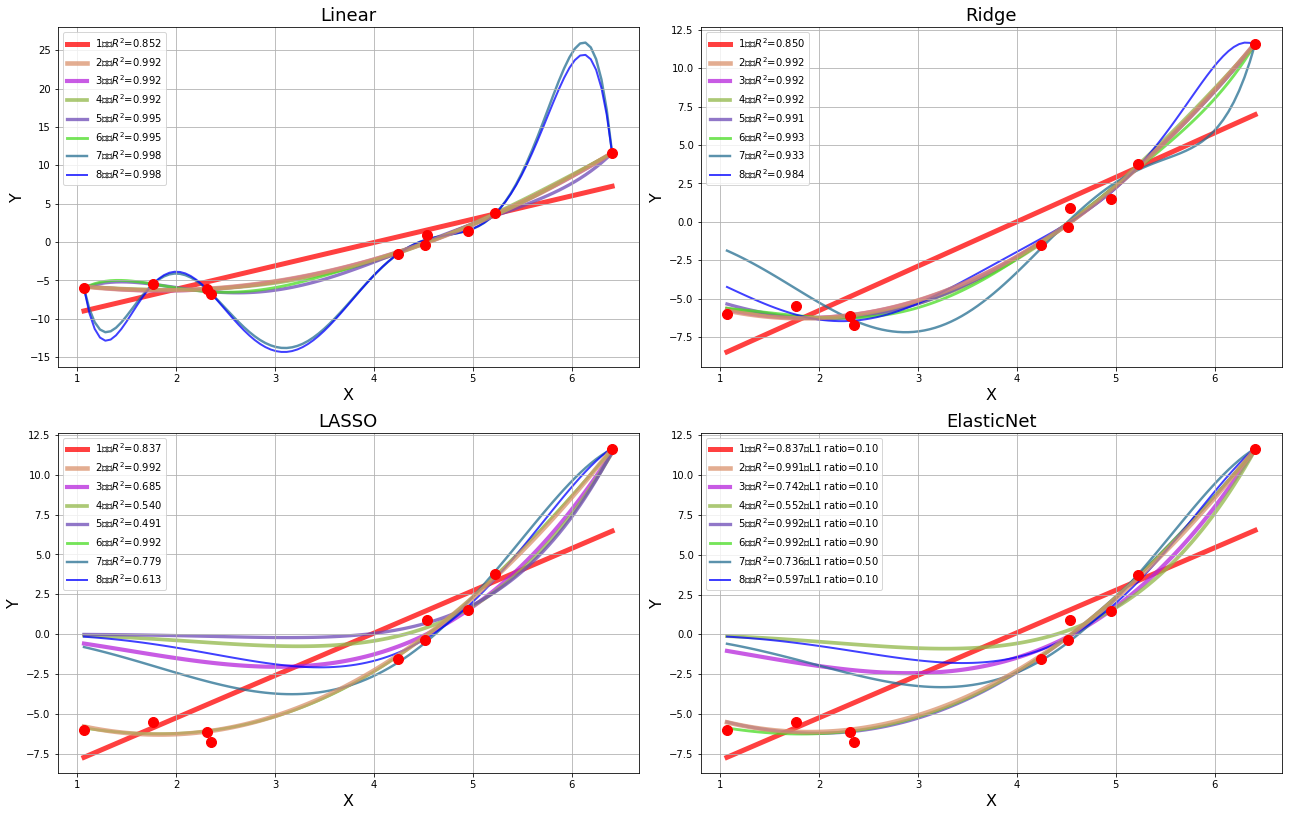

In [49]:
from sklearn.exceptions import ConvergenceWarning
import matplotlib as mpl
import warnings

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
N=9
plt.figure(figsize=(18, 12), facecolor='w')
d_pool = np.arange(1, N, 1)  # 阶
m = d_pool.size
clrs = []  # 颜色
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x' % int(c))
line_width = np.linspace(5, 2, m)
titles = u'Linear', u'Ridge', u'LASSO', u'ElasticNet'
for t in range(4):
    model = models[t]
    plt.subplot(2, 2, t+1)
    plt.plot(x, y, 'ro', ms=10, zorder=N)
    for i, d in enumerate(d_pool):
        model.set_params(poly__degree=d)
        model.fit(x, y.ravel())
        lin = model.get_params()['linear']
        output = u'%s：%d阶，系数为：' % (titles[t], d)
        if hasattr(lin, 'alpha_'):
            idx = output.find(u'系数')
            output = output[:idx] + (u'alpha=%.6f，' % lin.alpha_) + output[idx:]
        if hasattr(lin, 'l1_ratio_'):   # 根据交叉验证结果，从输入l1_ratio(list)中选择的最优l1_ratio_(float)
            idx = output.find(u'系数')
            output = output[:idx] + (u'l1_ratio=%.6f，' % lin.l1_ratio_) + output[idx:]
        print(output, lin.coef_.ravel())
        x_hat = np.linspace(x.min(), x.max(), num=100)
        x_hat.shape = -1, 1
        y_hat = model.predict(x_hat)
        s = model.score(x, y)
        r2, corr_coef = xss(y, model.predict(x))
        z = N - 1 if (d == 2) else 0
        label = u'%d阶，$R^2$=%.3f' % (d, s)
        if hasattr(lin, 'l1_ratio_'):
            label += u'，L1 ratio=%.2f' % lin.l1_ratio_
        plt.plot(x_hat, y_hat, color=clrs[i], lw=line_width[i], alpha=0.75, label=label, zorder=z)
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.title(titles[t], fontsize=18)
        plt.xlabel('X', fontsize=16)
        plt.ylabel('Y', fontsize=16)
plt.tight_layout(1, rect=(0, 0, 1, 0.95))
    

# 箹微花的分类

In [50]:
def loadIris():
    data=pd.read_csv('iris.data',header=None)
    return data
data=loadIris()
data[4]=pd.Categorical(data[4]).codes
train,test=train_test_split(data,train_size=.8,random_state=9)
train,test=np.array(train),np.array(test)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[5.89416667 3.075      3.85583333 1.24       1.04166667]


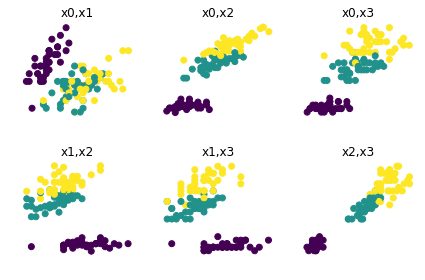

In [51]:
# sc=StandardScaler()
# train=sc.fit_transform(train)
#画图分类 
plt.figure(facecolor='w')
t=1
for i in range(4):
    for j in range(i+1,4):
        plt.subplot(2,3,t)
        t+=1
        plt.axis('off')
        plt.title('x%d,x%d'%(i,j))
        plt.scatter(train[:,i],train[:,j],c=train[:,4])
plt.tight_layout()
print(np.mean(train,axis=0))

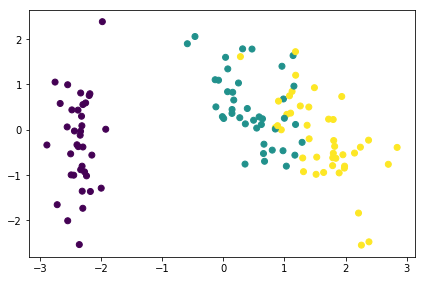

In [52]:
def pca(X):
    S,V=np.linalg.eig(X.T.dot(X))
    return X.dot(V[:,:2])
def standard(X):
    meanx=np.mean(X,axis=0,keepdims=True)
    stdx=np.std(X,axis=0,keepdims=True)
    return (X-meanx)/stdx
trainX,trainY=np.split(train,[4],axis=1)
trainX=standard(trainX)
pac_trainX=pca(trainX)

plt.scatter(pac_trainX[:,0],pac_trainX[:,1],c=train[:,4])
plt.tight_layout()

In [53]:
#学习下标准化类库的使用
d=np.random.rand(10,3)
print('mean:%f,std%f'%(np.mean(d),np.std(d)))
sc=StandardScaler()
d=sc.fit_transform(d)
print('mean:%f,std%f'%(np.mean(d),np.std(d)))

mean:0.506332,std0.255336
mean:0.000000,std1.000000


In [54]:
model=Pipeline([('sc',StandardScaler()),('poly',PolynomialFeatures(2)),('clf',LogisticRegression(fit_intercept=False,
                                                                                                 multi_class='multinomial',solver='lbfgs',
                                                                                                C=1e10)
                                                                       )])

In [59]:
trainX,trainY=np.split(train,[4],axis=1)
testX,testY=np.split(test,[4],axis=1)
trainX=trainX[:,[1,3]]
testX=testX[:,[1,3]]

(120, 5)


In [60]:
model.fit(trainX,trainY)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('clf', LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False))])

In [61]:
#学会获得分数函数的用法
print('训练准确率：',model.score(trainX,trainY))
testYhat=model.predict(testX)
print('测试准确率：',model.score(testX,testY))
print('10,11样本分数',model.decision_function(trainX[10:12]))
print('10,11样本概率',model.predict_proba(trainX[10:12]))
print('10样本类别',trainY[10])

训练准确率： 0.9416666666666667
测试准确率： 1.0
10,11样本分数 [[ 23.36966233  -0.56948763 -22.8001747 ]
 [ -6.38241135  -5.73561392  12.11802527]]
10,11样本概率 [[1.00000000e+00 4.01198475e-11 8.88575937e-21]
 [9.23341709e-09 1.76304342e-08 9.99999973e-01]]
10样本类别 [0.]


In [66]:
#画图前数据准备
M,N=100,100
data=np.array(data)
_min=np.min(data,axis=0)
_max=np.max(data,axis=0)

i,j=1,3 #选择i，j特征
Xi,Xj=np.mgrid[_min[i]:_max[i]:M*1j,_min[j]:_max[j]:N*1j]
m=Xi.size
samples=np.zeros((m,2))
samples[:,0]=Xi.ravel()
samples[:,1]=Xj.ravel()
print(samples[:4])
Yij=model.predict(samples).reshape(Xi.shape)

#样本数据预测
X,Y=np.split(data,(4,),axis=1)


[[2.         0.1       ]
 [2.         0.12424242]
 [2.         0.14848485]
 [2.         0.17272727]]


In [67]:
#画图
plt.figure(facecolor='w')
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

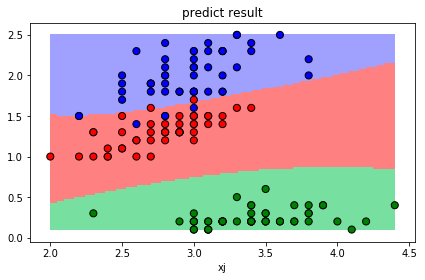

In [68]:
plt.pcolormesh(Xi, Xj, Yij, cmap=cm_light) 
plt.scatter(X[:,i], X[:,j], c=Y, edgecolors='k', s=50, cmap=cm_dark) 

plt.title('predict result')
plt.xlabel('xi')
plt.xlabel('xj')
plt.tight_layout()